In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
with open('cleaned_df.pickle', 'rb') as file:
    df = pickle.load(file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
has_basement     21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 3.5 MB


In [5]:
with open('regression_model1.pickle', 'rb') as file:
    model = pickle.load(file)

In [6]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.698      
Dependent Variable:       price                AIC:                    588949.4420
Date:                     2020-07-30 13:15     BIC:                    589093.0876
No. Observations:         21597                Log-Likelihood:         -2.9446e+05
Df Model:                 17                   F-statistic:            2936.      
Df Residuals:             21579                Prob (F-statistic):     0.00       
R-squared:                0.698                Scale:                  4.0772e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|     [0.025        0.975]   
----------------------------------------------------------------------------------
Intercept     6045740.6153 2941268.3866   2.0555 0.0398  280637.1446 11810844.0859
bedrooms       -36431.1956    1906.4168 -19.1098 0.0000  -40167.9133   -32694.4778
bathrooms       41521.1234    3273.4808  12.6841 0.0000   35104.8592    47937.3877
sqft_living       151.8617       4.4059  34.4676 0.0000     143.2257      160.4976
sqft_lot            0.1360       0.0481   2.8297 0.0047       0.0418        0.2303
floors           7753.9902    3611.8760   2.1468 0.0318     674.4462    14833.5342
waterfront     699558.8404   17397.1211  40.2112 0.0000  665459.1970   733658.4838
view           115981.7504    5221.0856  22.2141 0.0000  105748.0367   126215.4642
condition       27014.2208    2353.7303  11.4772 0.0000   22400.7355    31627.7061
grade           97746.2757    2166.2025  45.1233 0.0000   93500.3587   101992.1927
sqft_above         28.9612       4.3703   6.6268 0.0000      20.3950       37.5274
yr_built        -2650.6197      72.1786 -36.7230 0.0000   -2792.0952    -2509.1442
yr_renovated       24.1317       3.9898   6.0484 0.0000      16.3115       31.9520
zipcode          -575.7685      33.0947 -17.3976 0.0000    -640.6367     -510.9004
lat            597751.2435   10770.9365  55.4967 0.0000  576639.4117   618863.0753
long          -216954.7822   13203.4693 -16.4316 0.0000 -242834.5580  -191075.0063
sqft_living15      22.8233       3.4641   6.5885 0.0000      16.0334       29.6132
sqft_lot15         -0.3864       0.0736  -5.2510 0.0000      -0.5306       -0.2422
----------------------------------------------------------------------------------
Omnibus:                 18372.423          Durbin-Watson:             1.987      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1837283.188
Skew:                    3.572              Prob(JB):                  0.000      
Kurtosis:                47.617             Condition No.:             215444781  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)
#X = data.drop(['price', 'date','has_basement', 'id'], axis = 1)


In [8]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
len(y_test)

4320

In [10]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 41345928016.883644
Test Mean Squarred Error: 41156640598.709145


In [11]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squared Error:', rmse_train)
print('Test Root Mean Squared Error:', rmse_test)

Train Root Mean Squared Error: 203336.9814295561
Test Root Mean Squared Error: 202870.9949665283


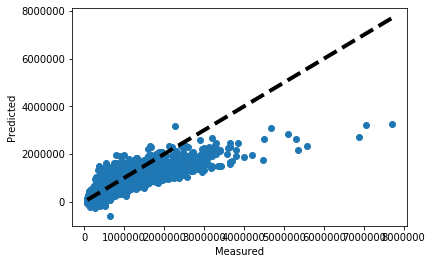

In [12]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

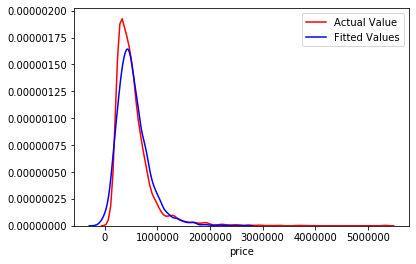

In [13]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [14]:
y_predicted = linreg.predict(X)

In [15]:
residuals = y - y_predicted

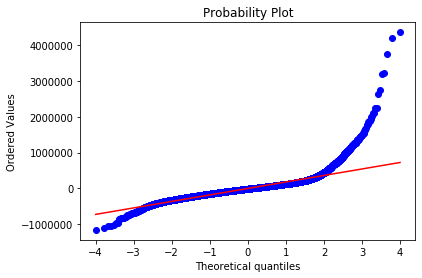

In [16]:
from scipy.stats import probplot

_ = probplot(residuals, plot=plt)

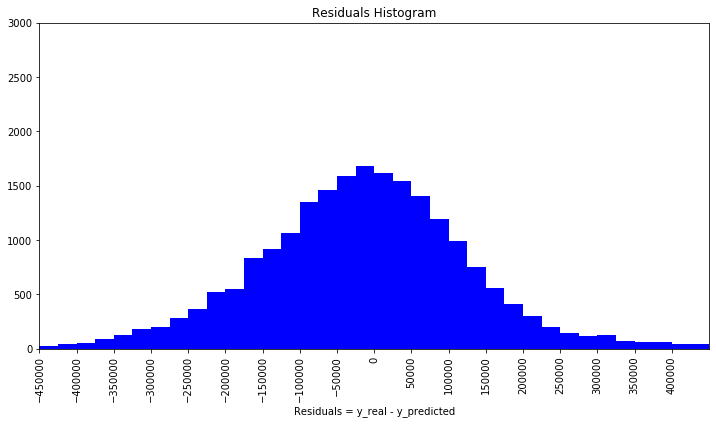

In [17]:
# Histogram for residuals
    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

Baseline Model:

Skew: 3.572 - very high

Kurtosis: - 47.61 (high amount of outliers)

R-squared - 0.69  - how well model fits 0-1

R-MSE - $202k

